In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt 

In [12]:
cell = mp.Vector3(200,15,0)

#Transition vectors
tranL = 30
startW = 10
endW = 1

vert = [mp.Vector3(-tranL/2,startW/2,0),mp.Vector3(tranL/2,endW/2,0),mp.Vector3(tranL/2,-endW/2,0),mp.Vector3(-tranL/2,-startW/2,0)]

geometry = [mp.Block(mp.Vector3(mp.inf,2,mp.inf),
                     center=mp.Vector3(),
                     material=mp.Medium(epsilon=12)),
            mp.Block(mp.Vector3(100,10,mp.inf),
                     center=mp.Vector3(-50-tranL/2,0,0),
                     material=mp.Medium(epsilon=12)),
            mp.Prism(vert,
                     4,
                     axis=mp.Vector3(0,0,1),
                     center=mp.Vector3(),
                     material=mp.Medium(epsilon=12))]
            


fsrc = 1/1.5475 # frequency of eigenmode or constant-amplitude source
df = 16e-3
nfreq = 3000

kx = 0.4    # initial guess for wavevector in x-direction of eigenmode
kpoint = mp.Vector3(kx)
bnum = 1    # band number of eigenmode

sources = [mp.EigenModeSource(src=mp.GaussianSource(fsrc,fwidth=df),
                              center=mp.Vector3(x=-94,y=0),
                              size=mp.Vector3(y=14),
                              direction=mp.NO_DIRECTION,
                              eig_kpoint=kpoint,
                              eig_band=bnum,
                              eig_parity=mp.EVEN_Y+mp.ODD_Z,
                              eig_match_freq=True)]

pml_layers = [mp.PML(1.0)]
            
            
resolution = 10

sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution,
                    eps_averaging=False)


# transmitted flux
tran_fr = mp.FluxRegion(center=mp.Vector3(24,0,0), size=mp.Vector3(0,14,0))
tran = sim.add_flux(fsrc, 8e-3, nfreq, tran_fr)



-----------
Initializing structure...
time for choose_chunkdivision = 0.000247002 s
Working in 2D dimensions.
Computational cell is 200 x 15 x 0 with resolution 10
     block, center = (0,0,0)
          size (1e+20,2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (-65,0,0)
          size (100,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     prism, center = (0,0,0)
          height 4, axis (0,0,1), sidewall angle: 0 radians, 4 vertices:
          (-15,5,-2)
          (15,0.5,-2)
          (15,-0.5,-2)
          (-15,-5,-2)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.287043 s
-----------
MPB solved for frequency_1(0.4,0,0) = 0.116229 after 20 iters
MPB solved for frequency_1(2.24611,0,0) = 0.648551 after 40 iters
MPB solved for frequency_1(2.23798,0,0) = 0.646204 after 11 iters
MPB solved for frequenc

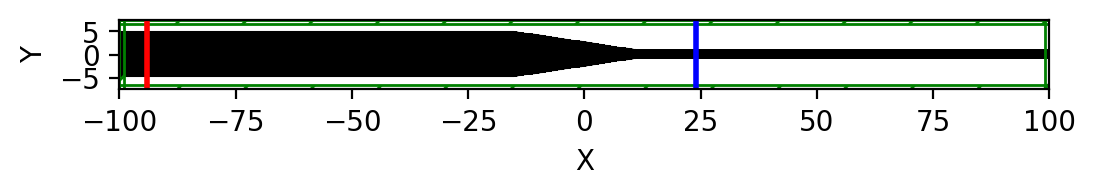

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(dpi=200)
sim.plot2D(plot_sources_flag=True,plot_monitors_flag=True,
          eps_parameters={'interpolation':'none'})
plt.show()

In [14]:
f = plt.figure(dpi=150)
Animate = mp.Animate2D(sim, fields=mp.Ez, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(0.5,Animate),until=100)
plt.close()

FloatProgress(value=0.0, description='0% done ')

Meep progress: 24.700000000000003/100.0 = 24.7% done in 4.0s, 12.2s to go
on time step 496 (time=24.8), 0.00807138 s/step
Meep progress: 53.2/100.0 = 53.2% done in 8.0s, 7.0s to go
on time step 1066 (time=53.3), 0.00702091 s/step
Meep progress: 81.55000000000001/100.0 = 81.6% done in 12.0s, 2.7s to go
on time step 1633 (time=81.65), 0.00705504 s/step
Normalizing field data...
run 0 finished at t = 100.0 (2000 timesteps)


In [5]:
from IPython.display import Video
filename = "bent_waveguide.mp4"
fps = 10
Animate.to_mp4(fps,filename)
Video(filename)

Generating MP4...
